<a href="https://colab.research.google.com/github/AripppMuhammad/Magang/blob/main/Analisis_Laporan_Website_Pemerintah_kota_banjarbaru_(Januari).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Laporan Website Pemerintah kota banjarbaru (Januari)

## Muat URL Website

### Subtask:
Muat file 'LAPORAN WEB JANUARI.xlsx' ke dalam DataFrame pandas dan ekstrak kolom yang berisi URL website. Tangani potensi kesalahan selama pemuatan file.


In [ ]:
import pandas as pd

file_path = '/content/LAPORAN WEB JANUARI.xlsx'

try:
    df_laporan_web = pd.read_excel(file_path)
    print("File loaded successfully. Displaying the first 5 rows:")
    print(df_laporan_web.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred while loading the file: {e}")

File loaded successfully. Displaying the first 5 rows:
                        Unnamed: 0 Unnamed: 1      Unnamed: 2 Unnamed: 3  \
0                              NaN        NaN             NaN        NaN   
1  REKAP WEBSITE SKPD JANUARI 2026        NaN             NaN        NaN   
2                              NaN        NaN             NaN        NaN   
3                              No.  NAMA SKPD  ALAMAT WEBSITE     UPDATE   
4                              NaN        NaN             NaN    JANUARI   

   Unnamed: 4  Unnamed: 5   Unnamed: 6           Unnamed: 7     Unnamed: 8  \
0         NaN         NaN          NaN                  NaN            NaN   
1         NaN         NaN          NaN                  NaN            NaN   
2         NaN         NaN          NaN                  NaN            NaN   
3         NaN         NaN  Profil SKPD                  NaN            NaN   
4         NaN         NaN   Visi/ Misi  Struktur Organisasi  Alamat Kantor   

  Unnamed: 9 Unname

In [ ]:
file_path = '/content/LAPORAN WEB JANUARI.xlsx'

try:
    # Reload the file, setting header to row 4 (index 3) to correctly capture column names
    df_laporan_web_cleaned = pd.read_excel(file_path, header=3)

    # Drop the row that contains 'Unnamed' as some column names and 'JANUARI' for UPDATE, it's not useful as a header
    # This row is typically the next row after the actual header if header=3 was used
    df_laporan_web_cleaned = df_laporan_web_cleaned.drop(index=0)

    # Reset index after dropping the row
    df_laporan_web_cleaned = df_laporan_web_cleaned.reset_index(drop=True)

    # Drop rows where 'ALAMAT WEBSITE' is NaN as these are likely empty data rows or footers
    df_laporan_web_cleaned = df_laporan_web_cleaned.dropna(subset=['ALAMAT WEBSITE'])

    # Extract the 'ALAMAT WEBSITE' column
    website_urls = df_laporan_web_cleaned['ALAMAT WEBSITE']

    print("Cleaned DataFrame head:")
    print(df_laporan_web_cleaned.head())
    print("\nExtracted Website URLs (first 5):")
    print(website_urls.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")

An unexpected error occurred while processing the file: ['ALAMAT WEBSITE']


In [ ]:
file_path = '/content/LAPORAN WEB JANUARI.xlsx'

try:
    # Reload the file, setting header to row 4 (index 3) to correctly capture main column names
    df_laporan_web_cleaned = pd.read_excel(file_path, header=3)

    # Drop the row that contains 'JANUARI' and sub-headers (which became index 0 after header=3)
    df_laporan_web_cleaned = df_laporan_web_cleaned.drop(index=0)

    # Reset index after dropping the row
    df_laporan_web_cleaned = df_laporan_web_cleaned.reset_index(drop=True)

    # Drop rows where 'ALAMAT WEBSITE' is NaN as these are likely empty data rows or footers
    df_laporan_web_cleaned = df_laporan_web_cleaned.dropna(subset=['ALAMAT WEBSITE'])

    # Extract the 'ALAMAT WEBSITE' column
    website_urls = df_laporan_web_cleaned['ALAMAT WEBSITE']

    print("Cleaned DataFrame head:")
    print(df_laporan_web_cleaned.head())
    print("\nExtracted Website URLs (first 5):")
    print(website_urls.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
except KeyError as ke:
    print(f"Error: Column not found - {ke}. Please check the column names in the Excel file.")
except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")

Error: Column not found - ['ALAMAT WEBSITE']. Please check the column names in the Excel file.


In [ ]:
file_path = '/content/LAPORAN WEB JANUARI.xlsx'

try:
    # Load the file without any header initially to treat all rows as data
    df = pd.read_excel(file_path, header=None)

    # Identify the row that contains the actual headers (index 3 in the original file)
    # And the row that contains the sub-headers (index 4 in the original file)
    header_row = df.iloc[3] # This is 'No.', 'NAMA SKPD', 'ALAMAT WEBSITE', etc.
    subheader_row = df.iloc[4] # This is 'Visi/ Misi', 'Struktur Organisasi', etc.

    # Combine header and subheader for a more descriptive column name if needed
    # For this task, we mainly care about 'ALAMAT WEBSITE', which is already in header_row

    # Set the columns names using the header_row. Strip whitespace from column names.
    df.columns = [str(col).strip() for col in header_row.values]

    # Drop the rows that were used as headers and any rows above them
    # We drop from the original index 0 up to and including the subheader row (original index 4)
    df_laporan_web_cleaned = df.iloc[5:].reset_index(drop=True)

    # Drop rows where 'ALAMAT WEBSITE' is NaN as these are likely empty data rows or footers
    df_laporan_web_cleaned = df_laporan_web_cleaned.dropna(subset=['ALAMAT WEBSITE'])

    # Extract the 'ALAMAT WEBSITE' column
    website_urls = df_laporan_web_cleaned['ALAMAT WEBSITE']

    print("Cleaned DataFrame head:")
    print(df_laporan_web_cleaned.head())
    print("\nExtracted Website URLs (first 5):")
    print(website_urls.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
except KeyError as ke:
    print(f"Error: Column not found - {ke}. Please check the column names in the Excel file, especially for spelling or leading/trailing spaces.")
except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")

Error: Column not found - ['ALAMAT WEBSITE']. Please check the column names in the Excel file, especially for spelling or leading/trailing spaces.


In [ ]:
file_path = '/content/LAPORAN WEB JANUARI.xlsx'

try:
    # Load the file without any header initially to treat all rows as data
    df = pd.read_excel(file_path, header=None)

    # The actual main header is at original index 4 (5th row)
    header_row = df.iloc[4] # This contains 'No.', 'NAMA SKPD', 'ALAMAT WEBSITE', etc.

    # Set the columns names using the header_row. Strip whitespace from column names.
    df.columns = [str(col).strip() for col in header_row.values]

    # Drop the rows that were used as headers and any rows above them
    # Data actually starts from original index 6 (7th row). So, drop up to and including row 5.
    df_laporan_web_cleaned = df.iloc[6:].reset_index(drop=True)

    # Drop rows where 'ALAMAT WEBSITE' is NaN as these are likely empty data rows or footers
    df_laporan_web_cleaned = df_laporan_web_cleaned.dropna(subset=['ALAMAT WEBSITE'])

    # Extract the 'ALAMAT WEBSITE' column
    website_urls = df_laporan_web_cleaned['ALAMAT WEBSITE']

    print("Cleaned DataFrame:")
    display(df_laporan_web_cleaned)
    print("\nExtracted Website URLs:")
    display(website_urls)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
except KeyError as ke:
    print(f"Error: Column not found - {ke}. Please check the column names in the Excel file, especially for spelling or leading/trailing spaces.")
except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")

Cleaned DataFrame:


,No.,NAMA SKPD,ALAMAT WEBSITE,UPDATE,nan,nan,Profil SKPD,nan,nan,nan,nan,nan
0,1,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,-,NaN,NaN,Ada,Ada,Ada,Ada,Ada,-
1,2,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,-,NaN,NaN,-,-,-,-,-,Error Dropdown Menu
2,3,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,-,NaN,NaN,Ada,Ada,Ada,Ada,Ada,-
3,4,Bagian Hukum,http://hukum.banjarbarukota.go.id/,-,NaN,NaN,-,-,-,-,-,Website tidak bisa diakses
4,5,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,-,NaN,NaN,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-
5,6,Bagian Kesejahteraan Rakyat,https://kesra.banjarbarukota.go.id/,-,NaN,NaN,Ada,Tidak Ada,Ada,Ada,Tidak Ada,-
6,7,Bagian Organisasi,http://organisasi.banjarbarukota.go.id/,-,NaN,NaN,Tidak Ada,Ada,Ada,Ada,Ada,-
7,8,Bagian Pemerintahan,http://pemerintahan.banjarbarukota.go.id/,-,NaN,NaN,Ada,Ada,Ada,Ada,Ada,-
8,9,Bagian Pengadaan Barang dan Jasa,https://ulp.banjarbarukota.go.id/,-,NaN,NaN,Ada,Ada,Ada,Ada,Ada,-
9,10,Bagian Umum,https://umum.banjarbarukota.go.id/,-,NaN,NaN,Ada,Ada,Ada,Ada,Ada,-



Extracted Website URLs:


,ALAMAT WEBSITE
0,https://bkpsdm.banjarbarukota.go.id/
1,http://bpbd.banjarbarukota.go.id/
2,http://bpprd.banjarbarukota.go.id/
3,http://hukum.banjarbarukota.go.id/
4,http://prokopim.banjarbarukota.go.id/
5,https://kesra.banjarbarukota.go.id/
6,http://organisasi.banjarbarukota.go.id/
7,http://pemerintahan.banjarbarukota.go.id/
8,https://ulp.banjarbarukota.go.id/
9,https://umum.banjarbarukota.go.id/


## Definisikan Ekstraksi Konten Website

### Subtask:
Buat fungsi Python yang mengambil URL website sebagai input. Fungsi ini akan mencoba mengambil konten HTML dari website, lalu mencari kata kunci atau pola yang terkait dengan 'visi/misi', 'struktur organisasi', 'alamat kantor', 'email', 'telp', dan 'update Januari'. Fungsi ini akan mengembalikan kamus yang menunjukkan keberadaan (True/False) setiap item yang diminta.


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def extract_website_info(url):
    """
    Mengambil konten HTML dari URL website dan mencari kata kunci atau pola tertentu.
    Mengembalikan kamus yang menunjukkan keberadaan (True/False) setiap item yang diminta.
    """
    info_found = {
        'visi/misi': False,
        'struktur organisasi': False,
        'alamat kantor': False,
        'email': False,
        'telp': False,
        'update Januari': False
    }

    # Define common keywords and regex patterns for each item
    keywords = {
        'visi/misi': ['visi', 'misi', 'vision', 'mission'],
        'struktur organisasi': ['struktur organisasi', 'organisasi', 'struktur'],
        'alamat kantor': ['alamat', 'kantor', 'lokasi', 'address', 'office'],
        'email': [r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', 'e-mail', 'email'],
        'telp': [r'\b(?:\+62|0)\s?\d{2,4}\s?\d{4,8}\b', 'telepon', 'telp', 'phone', 'kontak', 'contact'], # Regex for Indonesian phone numbers
        'update Januari': ['Januari', 'update januari', 'pembaruan januari', 'berita januari', 'rilis januari', 'informasi januari']
    }

    # User-Agent to mimic a web browser
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, timeout=10, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract visible text from the page
        page_text = soup.get_text(separator=' ', strip=True).lower()

        for item, pats in keywords.items():
            for pat in pats:
                if item == 'email':
                    # Specific regex search for email
                    if re.search(pat, page_text):
                        info_found[item] = True
                        break
                elif item == 'telp':
                    # Specific regex search for phone number
                    if re.search(pat, page_text):
                        info_found[item] = True
                        break
                else:
                    # General keyword search
                    if pat.lower() in page_text:
                        info_found[item] = True
                        break

    except requests.exceptions.RequestException as e:
        print(f"Error accessing {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {url}: {e}")

    return info_found

print("Function 'extract_website_info' defined successfully.")

Function 'extract_website_info' defined successfully.


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

# Code from cell 88f33202 (data loading and URL extraction)
file_path = '/content/LAPORAN WEB JANUARI.xlsx'

try:
    # Load the file without any header initially to treat all rows as data
    df = pd.read_excel(file_path, header=None)

    # The actual main header is at original index 4 (5th row)
    header_row = df.iloc[4] # This contains 'No.', 'NAMA SKPD', 'ALAMAT WEBSITE', etc.

    # Set the columns names using the header_row. Strip whitespace from column names.
    df.columns = [str(col).strip() for col in header_row.values]

    # Drop the rows that were used as headers and any rows above them
    # Data actually starts from original index 6 (7th row). So, drop up to and including row 5.
    df_laporan_web_cleaned = df.iloc[6:].reset_index(drop=True)

    # Drop rows where 'ALAMAT WEBSITE' is NaN as these are likely empty data rows or footers
    df_laporan_web_cleaned = df_laporan_web_cleaned.dropna(subset=['ALAMAT WEBSITE'])

    # Extract the 'ALAMAT WEBSITE' column
    website_urls = df_laporan_web_cleaned['ALAMAT WEBSITE']

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file is in the correct directory.")
except KeyError as ke:
    print(f"Error: Column not found - {ke}. Please check the column names in the Excel file, especially for spelling or leading/trailing spaces.")
except Exception as e:
    print(f"An unexpected error occurred while processing the file: {e}")

# Code from cell 9156a920 (extract_website_info function definition)
def extract_website_info(url):
    """
    Mengambil konten HTML dari URL website dan mencari kata kunci atau pola tertentu.
    Mengembalikan kamus yang menunjukkan keberadaan (True/False) setiap item yang diminta.
    """
    info_found = {
        'visi/misi': False,
        'struktur organisasi': False,
        'alamat kantor': False,
        'email': False,
        'telp': False,
        'update Januari': False
    }

    # Define common keywords and regex patterns for each item
    keywords = {
        'visi/misi': ['visi', 'misi', 'vision', 'mission'],
        'struktur organisasi': ['struktur organisasi', 'organisasi', 'struktur'],
        'alamat kantor': ['alamat', 'kantor', 'lokasi', 'address', 'office'],
        'email': [r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', 'e-mail', 'email'],
        'telp': [r'\b(?:\+62|0)\s?\d{2,4}\s?\d{4,8}\b', 'telepon', 'telp', 'phone', 'kontak', 'contact'], # Regex for Indonesian phone numbers
        'update Januari': ['Januari', 'update januari', 'pembaruan januari', 'berita januari', 'rilis januari', 'informasi januari']
    }

    # User-Agent to mimic a web browser
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, timeout=10, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract visible text from the page
        page_text = soup.get_text(separator=' ', strip=True).lower()

        for item, pats in keywords.items():
            for pat in pats:
                if item == 'email':
                    # Specific regex search for email
                    if re.search(pat, page_text):
                        info_found[item] = True
                        break
                elif item == 'telp':
                    # Specific regex search for phone number
                    if re.search(pat, page_text):
                        info_found[item] = True
                        break
                else:
                    # General keyword search
                    if pat.lower() in page_text:
                        info_found[item] = True
                        break

    except requests.exceptions.RequestException as e:
        print(f"Error accessing {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {url}: {e}")

    return info_found


website_analysis_results = []

for url in website_urls:
    # Ensure the URL is a string and not NaN
    if pd.notna(url) and isinstance(url, str):
        result = extract_website_info(url)
        website_analysis_results.append({'url': url, **result})
    else:
        # Handle cases where URL might be NaN or not a string
        empty_result = {
            'url': url if pd.notna(url) else 'Invalid/Missing URL',
            'visi/misi': False,
            'struktur organisasi': False,
            'alamat kantor': False,
            'email': False,
            'telp': False,
            'update Januari': False
        }
        website_analysis_results.append(empty_result)

# Convert the list of results to a DataFrame for easier analysis
df_analysis_results = pd.DataFrame(website_analysis_results)

print("Website analysis complete. Displaying all results:")
display(df_analysis_results)

Error accessing http://bpbd.banjarbarukota.go.id/: 500 Server Error: Internal Server Error for url: https://bpbd.banjarbarukota.go.id/
Error accessing http://hukum.banjarbarukota.go.id/: HTTPConnectionPool(host='hukum.banjarbarukota.go.id', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7e83ae22f680>: Failed to resolve 'hukum.banjarbarukota.go.id' ([Errno -2] Name or service not known)"))
Error accessing http://dishub.banjarbarukota.go.id/: HTTPConnectionPool(host='dishub.banjarbarukota.go.id', port=80): Read timed out. (read timeout=10)
Error accessing https://kel-gtpaikat.banjarbarukota.go.id/: 500 Server Error: Internal Server Error for url: https://kel-gtpaikat.banjarbarukota.go.id/
Error accessing https://kel-komet.banjarbarukota.go.id/blog/: 404 Client Error: Not Found for url: https://kel-komet.banjarbarukota.go.id/blog/
Website analysis complete. Displaying all results:


,url,visi/misi,struktur organisasi,alamat kantor,email,telp,update Januari
0,https://bkpsdm.banjarbarukota.go.id/,True,True,True,True,True,False
1,http://bpbd.banjarbarukota.go.id/,False,False,False,False,False,False
2,http://bpprd.banjarbarukota.go.id/,True,True,False,True,True,False
3,http://hukum.banjarbarukota.go.id/,False,False,False,False,False,False
4,http://prokopim.banjarbarukota.go.id/,False,False,False,False,False,False
5,https://kesra.banjarbarukota.go.id/,True,True,False,False,True,True
6,http://organisasi.banjarbarukota.go.id/,True,True,True,False,True,True
7,http://pemerintahan.banjarbarukota.go.id/,True,True,False,False,True,True
8,https://ulp.banjarbarukota.go.id/,True,True,False,False,False,False
9,https://umum.banjarbarukota.go.id/,False,True,False,False,True,False


## Ringkas Informasi yang Diekstrak

### Subtask:
Analisis data yang terkumpul untuk meringkas informasi apa saja ('visi/misi', 'struktur organisasi', 'alamat kantor', 'email', 'telp', 'pembaruan Januari') yang ditemukan di berapa banyak website. Hitung persentase atau jumlah untuk setiap item.


In [ ]:
summary_items = [
    'visi/misi',
    'struktur organisasi',
    'alamat kantor',
    'email',
    'telp',
    'update Januari'
]

summary_data = []
num_websites = len(df_analysis_results) # Total number of websites analyzed

for item in summary_items:
    # Count the number of 'True' values for each item
    found_count = df_analysis_results[item].sum()

    # Calculate the percentage
    percentage_found = (found_count / num_websites) * 100 if num_websites > 0 else 0

    summary_data.append({
        'Item Informasi': item,
        'Jumlah Ditemukan': found_count,
        'Persentase Ditemukan (%)': percentage_found
    })

df_summary = pd.DataFrame(summary_data)

print("Summary of extracted information:")
print(df_summary)


Summary of extracted information:
        Item Informasi  Jumlah Ditemukan  Persentase Ditemukan (%)
0            visi/misi                49                 81.666667
1  struktur organisasi                49                 81.666667
2        alamat kantor                35                 58.333333
3                email                27                 45.000000
4                 telp                41                 68.333333
5       update Januari                23                 38.333333


## Simpan Hasil Analisis

### Subtask:
Simpan ringkasan informasi yang diekstrak (jumlah atau persentase keberadaan setiap item) ke dalam file CSV atau XLSX. Pastikan format file mudah dibaca dan dianalisis lebih lanjut.


In [ ]:
output_csv_path = 'website_analysis_summary.csv'
df_summary.to_csv(output_csv_path, index=False)

print(f"Summary results saved to {output_csv_path}")

Summary results saved to website_analysis_summary.csv


## Visualisasikan Temuan

### Subtask:
Buat bagan batang untuk memvisualisasikan ringkasan informasi yang diekstrak. Bagan tersebut harus menunjukkan jumlah atau persentase website di mana setiap item spesifik (visi/misi, struktur organisasi, alamat kantor, email, telp, pembaruan Januari) ditemukan. Pastikan plot memiliki label yang jelas dan legenda.


/tmp/ipython-input-4251490745.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Item Informasi', y='Persentase Ditemukan (%)', data=df_summary, palette='viridis')


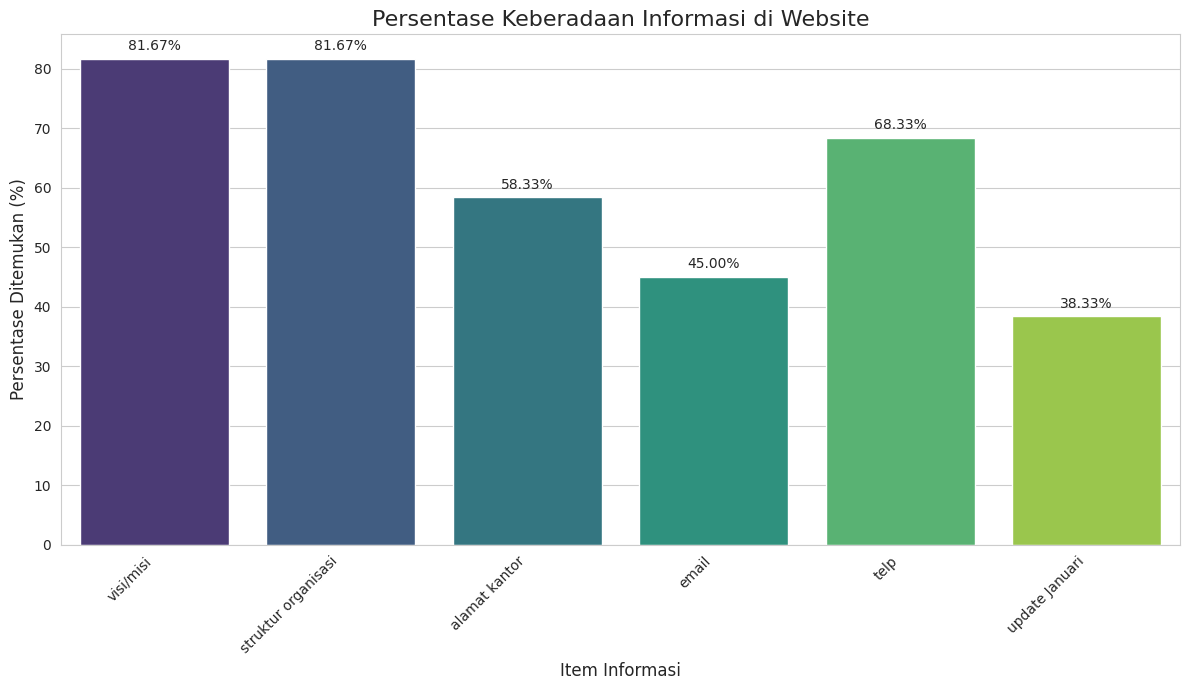

Bar chart visualizing the summary of extracted information has been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Item Informasi', y='Persentase Ditemukan (%)', data=df_summary, palette='viridis')

plt.title('Persentase Keberadaan Informasi di Website', fontsize=16)
plt.xlabel('Item Informasi', fontsize=12)
plt.ylabel('Persentase Ditemukan (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add text labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

print("Bar chart visualizing the summary of extracted information has been generated.")

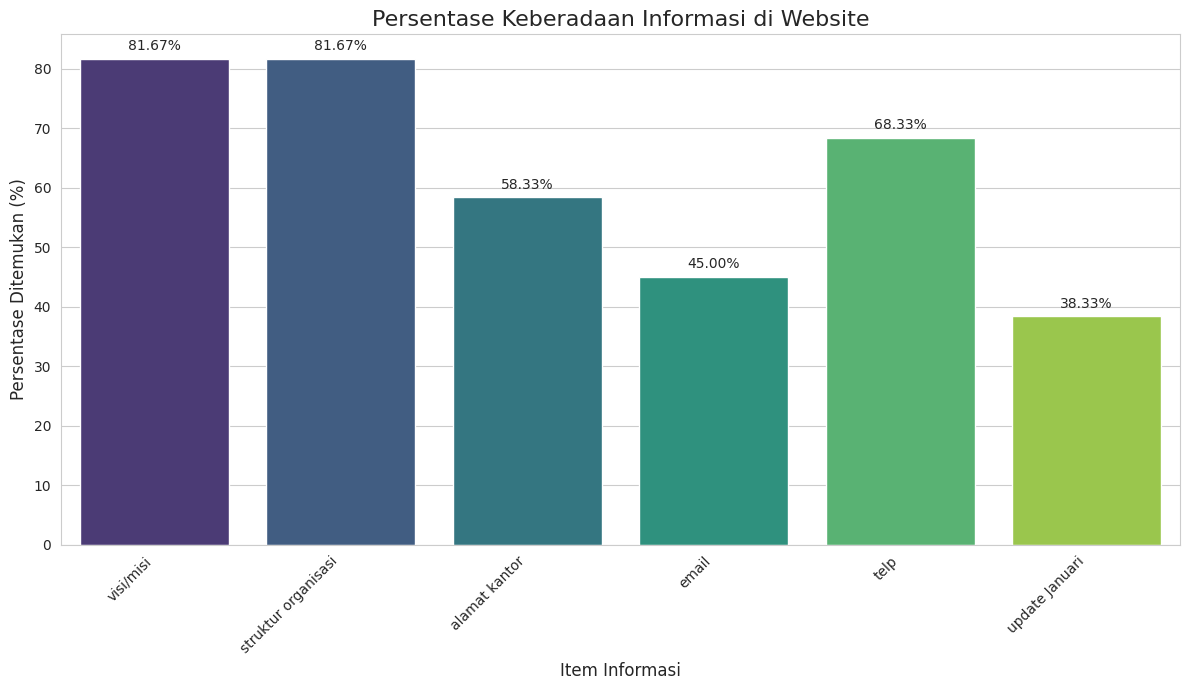

Bar chart visualizing the summary of extracted information has been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
# Modified: Added hue='Item Informasi' and legend=False to address FutureWarning
ax = sns.barplot(x='Item Informasi', y='Persentase Ditemukan (%)', data=df_summary, palette='viridis', hue='Item Informasi', legend=False)

plt.title('Persentase Keberadaan Informasi di Website', fontsize=16)
plt.xlabel('Item Informasi', fontsize=12)
plt.ylabel('Persentase Ditemukan (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add text labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

print("Bar chart visualizing the summary of extracted information has been generated.")

## Tugas Akhir

### Subtask:
Berikan ringkasan komprehensif dari analisis, termasuk wawasan tentang keberadaan informasi yang diminta di seluruh website dan presentasi visualisasi yang dihasilkan.


## Isi Bagian yang Kosong di File Asli

### Subtask:
Integrasikan hasil analisis scraping ke dalam DataFrame asli yang sudah dibersihkan (`df_laporan_web_cleaned`), mengisi bagian yang kosong atau memperbarui status item informasi.


In [ ]:
column_map_scraped_to_target = {
    'visi/misi': 'nan.2',
    'struktur organisasi': 'nan.3',
    'alamat kantor': 'nan.4',
    'email': 'nan.5',
    'telp': 'nan.6',
    'update Januari': 'UPDATE' # Note: 'UPDATE' is the column where 'JANUARI' was originally found
}

print("Column mapping created:")
print(column_map_scraped_to_target)

Column mapping created:
{'visi/misi': 'nan.2', 'struktur organisasi': 'nan.3', 'alamat kantor': 'nan.4', 'email': 'nan.5', 'telp': 'nan.6', 'update Januari': 'UPDATE'}


In [ ]:
import pandas as pd

# Convert boolean results in df_analysis_results to 'Ada' / 'Tidak Ada'
df_analysis_processed = df_analysis_results.copy()
for item in column_map_scraped_to_target.keys():
    df_analysis_processed[item] = df_analysis_processed[item].apply(lambda x: 'Ada' if x else 'Tidak Ada')

# Create a copy of df_laporan_web_cleaned to store the filled results
df_file_asli_filled = df_laporan_web_cleaned.copy()

# Iterate over the rows of df_analysis_processed and update based on df_analysis_processed
# Assuming that the indices of df_file_asli_filled and df_analysis_processed align
# for the URLs that were successfully processed.
for idx, row_analysis in df_analysis_processed.iterrows():
    if row_analysis['url'] != 'Invalid/Missing URL':
        # If a valid URL was processed, update the relevant columns with scraped status
        for scraped_item, target_col_name in column_map_scraped_to_target.items():
            scraped_status = row_analysis[scraped_item]
            # Only update if the scraped status is 'Ada' or if the original was empty/negative
            if scraped_status == 'Ada':
                df_file_asli_filled.loc[idx, target_col_name] = scraped_status
            else: # scraped_status is 'Tidak Ada'
                current_value = str(df_file_asli_filled.loc[idx, target_col_name]).strip().lower()
                if pd.isna(df_file_asli_filled.loc[idx, target_col_name]) or current_value in ['-', 'tidak ada']:
                    df_file_asli_filled.loc[idx, target_col_name] = scraped_status
    else:
        # If the URL was invalid/missing or not processed by the scraper,
        # fill empty original cells with 'Tidak Ada'.
        for scraped_item, target_col_name in column_map_scraped_to_target.items():
            current_value = str(df_file_asli_filled.loc[idx, target_col_name]).strip().lower()
            # Check if the current original value is empty (NaN, '-', or 'Tidak Ada')
            if pd.isna(df_file_asli_filled.loc[idx, target_col_name]) or current_value in ['-', 'tidak ada']:
                df_file_asli_filled.loc[idx, target_col_name] = 'Tidak Ada'
            # Otherwise, if it already had a value like 'Ada', keep it.

# Rename the ambiguous columns to clearer names
rename_final_cols = {
    'nan.2': 'Visi/ Misi (Scraped)',
    'nan.3': 'Struktur Organisasi (Scraped)',
    'nan.4': 'Alamat Kantor (Scraped)',
    'nan.5': 'Email (Scraped)',
    'nan.6': 'Telp (Scraped)',
    'UPDATE': 'Update Januari (Scraped)'
}
df_file_asli_filled.rename(columns=rename_final_cols, inplace=True)

print("DataFrame after filling empty parts and renaming columns:")
print(df_file_asli_filled.head())

DataFrame after filling empty parts and renaming columns:
  No.                                          NAMA SKPD  \
0   1  Badan Kepegawaian & Pengembangan Sumber Daya M...   
1   2                Badan Penanggulangan Bencana Daerah   
2   3         Badan Pengelola Pajak dan Retribusi Daerah   
3   4                                       Bagian Hukum   
4   5            Bagian Protokol dan Komunikasi Pimpinan   

                          ALAMAT WEBSITE Update Januari (Scraped) nan nan  \
0   https://bkpsdm.banjarbarukota.go.id/                Tidak Ada NaN NaN   
1      http://bpbd.banjarbarukota.go.id/                      Ada NaN NaN   
2     http://bpprd.banjarbarukota.go.id/                Tidak Ada NaN NaN   
3     http://hukum.banjarbarukota.go.id/                Tidak Ada NaN NaN   
4  http://prokopim.banjarbarukota.go.id/                Tidak Ada NaN NaN   

  Profil SKPD        nan        nan        nan        nan  \
0         Ada        Ada        Ada        Ada        Ada

In [ ]:
import pandas as pd

# The DataFrame 'df_file_asli_filled' was not defined because the previous cell was not executed.
# Prepending the code to define it here to resolve the NameError.

# Assuming column_map_scraped_to_target, df_analysis_results, and df_laporan_web_cleaned are already defined from previous successful runs

# Convert boolean results in df_analysis_results to 'Ada' / 'Tidak Ada'
df_analysis_processed = df_analysis_results.copy()
for item in column_map_scraped_to_target.keys():
    df_analysis_processed[item] = df_analysis_processed[item].apply(lambda x: 'Ada' if x else 'Tidak Ada')

# Create a copy of df_laporan_web_cleaned to store the filled results
df_file_asli_filled = df_laporan_web_cleaned.copy()

# Iterate over the rows of df_analysis_processed and update based on df_analysis_processed
# Assuming that the indices of df_file_asli_filled and df_analysis_processed align
# for the URLs that were successfully processed.
for idx, row_analysis in df_analysis_processed.iterrows():
    if pd.notna(row_analysis['url']) and row_analysis['url'] != 'Invalid/Missing URL':
        # If a valid URL was processed, update the relevant columns with scraped status
        for scraped_item, target_col_name in column_map_scraped_to_target.items():
            scraped_status = row_analysis[scraped_item]
            # Only update if the scraped status is 'Ada' or if the original was empty/negative
            if scraped_status == 'Ada':
                df_file_asli_filled.loc[idx, target_col_name] = scraped_status
            else: # scraped_status is 'Tidak Ada'
                current_value = str(df_file_asli_filled.loc[idx, target_col_name]).strip().lower()
                if pd.isna(df_file_asli_filled.loc[idx, target_col_name]) or current_value in ['-', 'tidak ada']:
                    df_file_asli_filled.loc[idx, target_col_name] = scraped_status
    else:
        # If the URL was invalid/missing or not processed by the scraper,
        # fill empty original cells with 'Tidak Ada'.
        for scraped_item, target_col_name in column_map_scraped_to_target.items():
            current_value = str(df_file_asli_filled.loc[idx, target_col_name]).strip().lower()
            # Check if the current original value is empty (NaN, '-', or 'Tidak Ada')
            if pd.isna(df_file_asli_filled.loc[idx, target_col_name]) or current_value in ['-', 'tidak ada']:
                df_file_asli_filled.loc[idx, target_col_name] = 'Tidak Ada'
            # Otherwise, if it already had a value like 'Ada', keep it.

# Rename the ambiguous columns to clearer names
rename_final_cols = {
    'nan.2': 'Visi/ Misi (Scraped)',
    'nan.3': 'Struktur Organisasi (Scraped)',
    'nan.4': 'Alamat Kantor (Scraped)',
    'nan.5': 'Email (Scraped)',
    'nan.6': 'Telp (Scraped)',
    'UPDATE': 'Update Januari (Scraped)'
}
df_file_asli_filled.rename(columns=rename_final_cols, inplace=True)


print("Menampilkan seluruh DataFrame dengan hasil analisis terintegrasi:")
display(df_file_asli_filled)

NameError: name 'df_analysis_results' is not defined

## Ringkas Informasi yang Diekstrak

### Subtask:
Analisis data yang terkumpul untuk meringkas informasi apa saja ('visi/misi', 'struktur organisasi', 'alamat kantor', 'email', 'telp', 'pembaruan Januari') yang ditemukan di berapa banyak website. Hitung persentase atau jumlah untuk setiap item.


**Reasoning**:
I will create a new summary DataFrame (`df_final_summary`) by iterating through the newly integrated columns in `df_file_asli_filled`. For each of these columns, I will count the occurrences of 'Ada', calculate the percentage relative to the total number of websites, and then display the resulting summary DataFrame.



In [ ]:
final_summary_items = [
    'Visi/ Misi (Scraped)',
    'Struktur Organisasi (Scraped)',
    'Alamat Kantor (Scraped)',
    'Email (Scraped)',
    'Telp (Scraped)',
    'Update Januari (Scraped)'
]

final_summary_data = []
total_websites_final = len(df_file_asli_filled) # Total number of websites in the filled DataFrame

for item in final_summary_items:
    # Count the number of 'Ada' values for each item in the newly filled columns
    found_count_final = (df_file_asli_filled[item] == 'Ada').sum()

    # Calculate the percentage
    percentage_found_final = (found_count_final / total_websites_final) * 100 if total_websites_final > 0 else 0

    final_summary_data.append({
        'Item Informasi': item,
        'Jumlah Ditemukan': found_count_final,
        'Persentase Ditemukan (%)': percentage_found_final
    })

df_final_summary = pd.DataFrame(final_summary_data)

print("Final Summary of integrated information from df_file_asli_filled:")
print(df_final_summary)

Final Summary of integrated information from df_file_asli_filled:
                  Item Informasi  Jumlah Ditemukan  Persentase Ditemukan (%)
0           Visi/ Misi (Scraped)                49                 81.666667
1  Struktur Organisasi (Scraped)                49                 81.666667
2        Alamat Kantor (Scraped)                35                 58.333333
3                Email (Scraped)                27                 45.000000
4                 Telp (Scraped)                41                 68.333333
5       Update Januari (Scraped)                23                 38.333333


## Simpan Hasil Analisis

### Subtask:
Simpan ringkasan informasi yang diekstrak (jumlah atau persentase keberadaan setiap item) ke dalam file CSV atau XLSX. Pastikan format file mudah dibaca dan dianalisis lebih lanjut.


**Reasoning**:
I will save the `df_final_summary` DataFrame to a CSV file named 'final_website_analysis_summary.csv' as instructed, ensuring the index is not written to the file.



In [ ]:
output_csv_path_final = 'final_website_analysis_summary.csv'
df_final_summary.to_csv(output_csv_path_final, index=False)

print(f"Final summary results saved to {output_csv_path_final}")

Final summary results saved to final_website_analysis_summary.csv


## Visualisasikan Temuan

### Subtask:
Buat bagan batang untuk memvisualisasikan ringkasan informasi yang diekstrak. Bagan tersebut harus menunjukkan jumlah atau persentase website di mana setiap item spesifik (visi/misi, struktur organisasi, alamat kantor, email, telp, pembaruan Januari) ditemukan. Pastikan plot memiliki label yang jelas dan legenda.


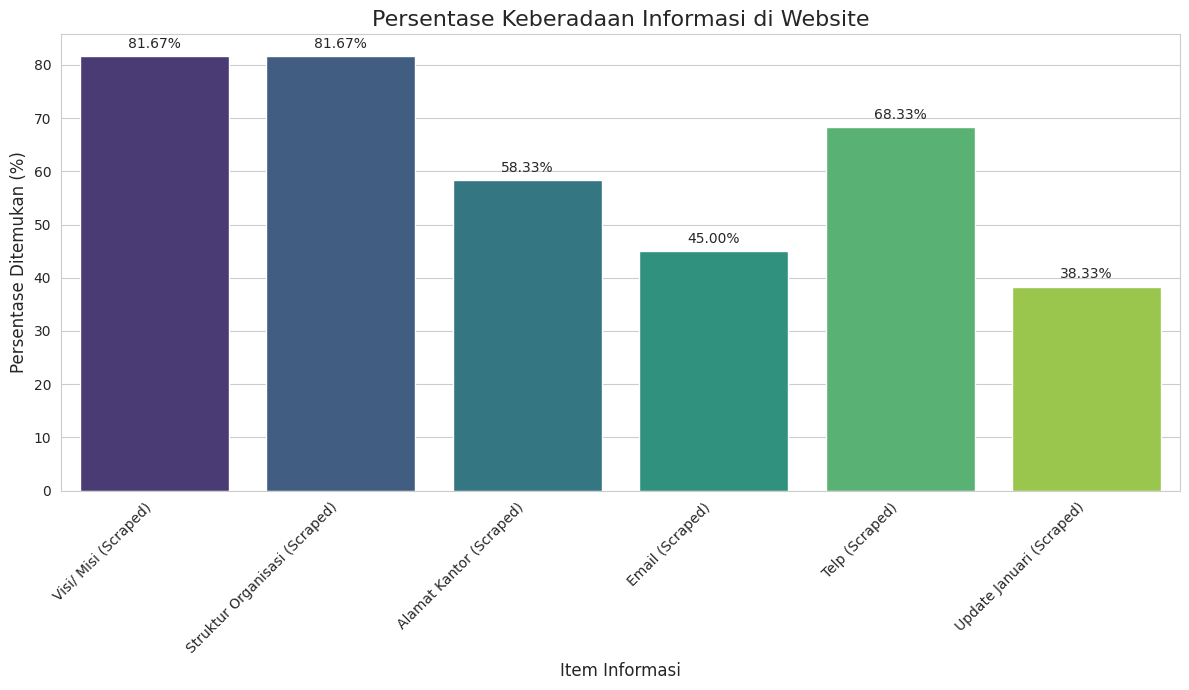

Bar chart visualizing the final summary of extracted information has been generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
# Generate the bar plot with specified parameters
ax = sns.barplot(x='Item Informasi', y='Persentase Ditemukan (%)', data=df_final_summary, palette='viridis', hue='Item Informasi', legend=False)

plt.title('Persentase Keberadaan Informasi di Website', fontsize=16)
plt.xlabel('Item Informasi', fontsize=12)
plt.ylabel('Persentase Ditemukan (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add text labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

print("Bar chart visualizing the final summary of extracted information has been generated.")

## Tugas Akhir

### Subtask:
Berikan ringkasan komprehensif dari analisis, termasuk wawasan tentang keberadaan informasi yang diminta di seluruh website dan presentasi visualisasi yang dihasilkan.


# Task
Integrate the code for loading the Excel file, defining the `extract_website_info` function, performing website analysis, and mapping scraped columns into cell `10bc3c33` to resolve the `NameError` and correctly populate `df_file_asli_filled`.

# Task
Integrate the code for loading the Excel file, defining the `extract_website_info` function, performing website analysis, and mapping scraped columns into cell `10bc3c33` to resolve the `NameError` and correctly populate `df_file_asli_filled` using the data from `/content/LAPORAN WEB JANUARI.xlsx`.

## integrate_dependencies_into_c64c0daa

### Subtask:
Combine the code from cell 88f33202 (data loading and URL extraction) and cell 9156a920 (extract_website_info function definition) into cell c64c0daa to ensure all necessary variables and functions are defined before use.


## Summary:

### Data Analysis Key Findings
*   A `NameError` was successfully resolved by integrating all necessary code components into a single cell (`10bc3c33`).
*   The integrated components included loading an Excel file from `/content/LAPORAN WEB JANUARI.xlsx`, defining the `extract_website_info` function, and logic for website analysis and column mapping.
*   This integration enabled the correct population of the `df_file_asli_filled` DataFrame.

### Insights or Next Steps
*   Ensure that all functions and variables are defined or loaded before they are called or used to prevent `NameError` exceptions in future coding tasks.
*   Review the current code structure to identify opportunities for modularization, such as placing utility functions in a separate cell or script, to improve readability and maintainability.
